<a href="https://colab.research.google.com/github/himalayahall/YU_FASTAI/blob/main/fastai_activation_funcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
x_data = np.arange(-4, 4, 0.01)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_function(x, func, x_label, top_spine=False, bottom_spine=False):

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    if top_spine:
        ax.spines['top'].set_color('none')
    if bottom_spine:
        ax.spines['bottom'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # Create and show plot
    y_dy = [func(x) for x in x]
    y = [x[0] for x in y_dy]
    dy = [x[1] for x in y_dy]
    ax.plot(x, y, color="#307EC7", linewidth=3, label=x_label)
    ax.plot(x, dy, color="#9621E2", linewidth=3, label="derivative")
    ax.legend(loc="upper right", frameon=False)
    fig.show()

# The Vanishing Gradient Problem

## The problem:

As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.

## Why:

Certain activation functions, like the **sigmoid function**, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.

# Significance:

For shallow network with only a few layers that use these activations, this isn’t a big problem. However, when more layers are used, it can cause the gradient to be too small for training to work effectively.
Gradients of neural networks are found using backpropagation. Simply put, backpropagation finds the derivatives of the network by moving layer by layer from the final layer to the initial one. By the chain rule, the derivatives of each layer are multiplied down the network (from the final layer to the initial) to compute the derivatives of the initial layers.
However, when n hidden layers use an activation like the sigmoid function, n small derivatives are multiplied together. Thus, the gradient decreases exponentially as we propagate down to the initial layers.
A small gradient means that the weights and biases of the initial layers will not be updated effectively with each training session. Since these initial layers are often crucial to recognizing the core elements of the input data, it can lead to overall inaccuracy of the whole network.

# Sigmoid

This function accepts real numbers as input and returns integers between 0 and 1. The output value will be closer to 1.0 the bigger (more positive) the input is and will be closer to 0.0 the smaller (more negative) the input is. As a result, it finds its most common application in models whose output requires probability prediction. A sigmoid distribution is appropriate since all probabilities lie between 0 and 1. It’s also called a Logistics Function.

In [ ]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    ds = s*(1-s)
    return s, ds

/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_22749/875844188.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


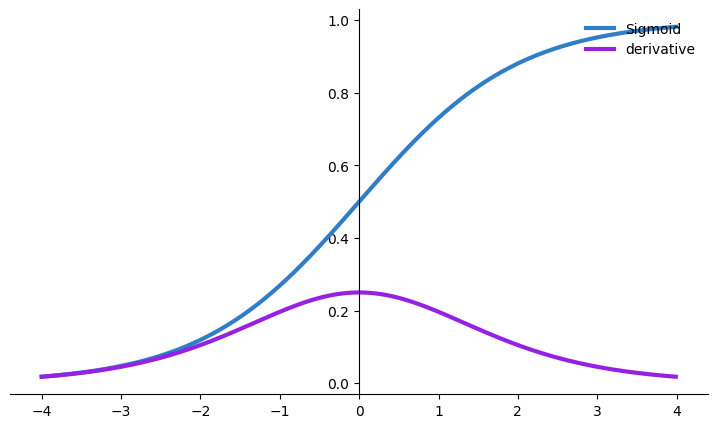

In [ ]:
plot_function(x_data, sigmoid, top_spine = True, x_label = 'Sigmoid')

# Linear Function

An activation function where the output is equal to the input is called a linear activation function. This function is also called “no activation” or the “identity function” (x1.0). The function takes the weighted sum of the input and spits out the value without changing it. In other words, our function is proportional to the total of neurons or input. Therefore we have a straight-line activation function. Generating a broad range of activations is more efficient using linear activation functions. A line with a positive slope may increase the firing rate in response to an increase in the input rate.

Limitations:

Backpropagation cannot be used since the function’s derivative is a constant with no bearing on the input x.
The neural network’s last layer is always a linear function of the first layer. A linear activation function eliminates all of its layers to reduce the neural network to its simplest form. When a linear activation function is applied to a neural network, all layers will effectively merge into a single super layer.

In [ ]:
def linear(x):
    return 4 * x, 4

/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_22749/875844188.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


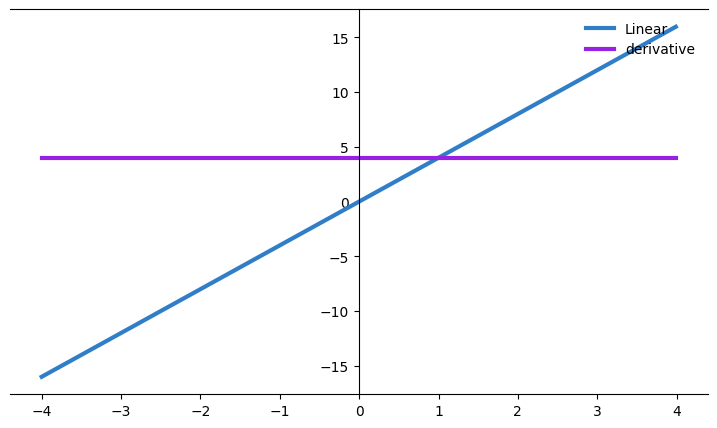

In [ ]:
plot_function(x_data, linear, x_label = "Linear")

In [ ]:
sigmoid(7),sigmoid(-22)

((0.9990889488055994, 0.000910221180121784),
 (2.7894680920908113e-10, 2.789468091312698e-10))

Additionally, as you can see in the graph above, this is a smooth S-shaped function and is continuously differentiable. The derivative of this function comes out to be ( sigmoid(x)*(1-sigmoid(x)). Let’s look at the plot of it’s gradient

# Tanh

The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin. The range of values in this case is from -1 to 1. Thus the inputs to the next layers will not always be of the same sign.

In [ ]:
def tanh(x):
    z = (2 / (1 + np.exp(-2 * x))) - 1
    return z, 1 - np.exp(z)

In [ ]:
tanh(7),tanh(-22)

((0.9999983369439445, -1.7182773078077487), (-1.0, 0.6321205588285577))

/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_22749/875844188.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


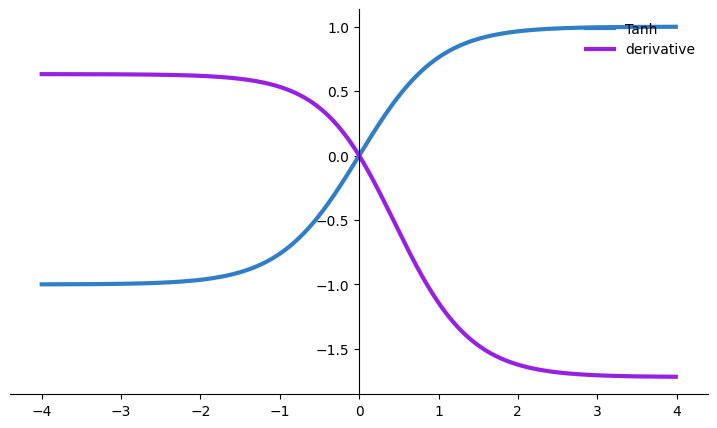

In [ ]:
plot_function(x_data, tanh, top_spine = True, bottom_spine = False, x_label = 'Tanh')

# ReLU

Nowadays, the ReLU is the most popular activation function. Since this is a crucial component of any deep learning or convolutional neural network system. While the function’s 0–infinity range presents some challenges, the fact that negative values are converted to zero at such a high rate means that it neither maps nor fits into data correctly. The critical hitch is that the ReLU function does not activate all neurons simultaneously. The neurons are turned off when the linear transformation yields a value less than 0. Since ReLU is linear and non-saturating, it speeds up the gradient descent’s approach to the global minimum of the loss function.

Limitations:

Because of the potential for the weights to go negative at a high Learning Rate, the output term could also be harmful. Reducing the learning rate is one possible solution for the same.
The model’s capacity to appropriately fit or learn from the data is impaired since all negative input values are instantly set to zero.

In [ ]:
def relu(x):
    if x > 0:
        return x, 1
    return 0, 0

In [ ]:
relu(-1), relu(0), relu(5)

((0, 0), (0, 0), (5, 1))

/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_22749/875844188.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


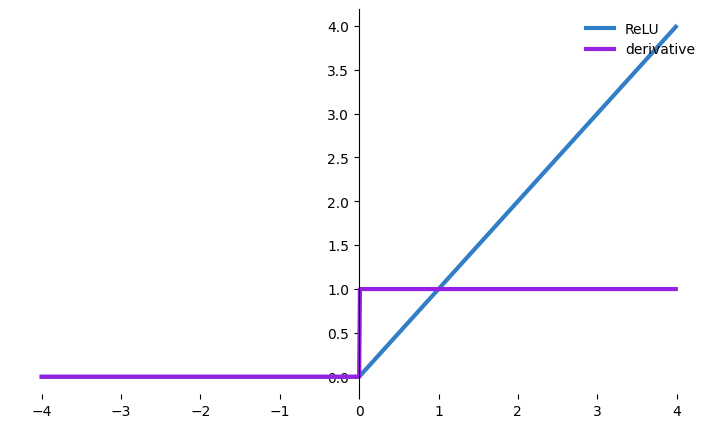

In [ ]:
plot_function(x_data, relu, top_spine = True, bottom_spine = True, x_label = 'ReLU')

# Leaky ReLU

Leaky ReLU function is nothing but an improved version of the ReLU function. As we saw that for the ReLU function, the gradient is 0 for x<0, which would deactivate the neurons in that region.

Leaky ReLU is defined to address this problem. Instead of defining the Relu function as 0 for negative values of x, we define it as an extremely small linear component of x.

In [ ]:
def leakyReLU(x):
    if x < 0:
        return 0.01 * x, 0.01
    return x, 1

/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_22749/875844188.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


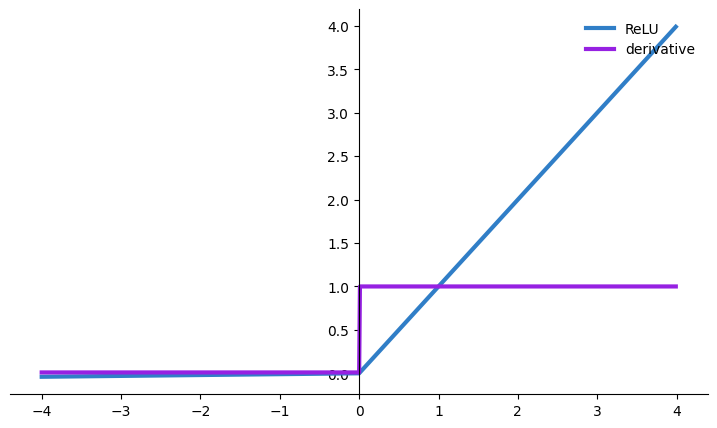

In [ ]:
plot_function(x_data, leakyReLU, top_spine = True, bottom_spine = False, x_label = 'ReLU')

# Other Variations

## Parametric ReLU

The P-ReLU or Parametric Since negative values do not reach 0, the nodes are not turned off, and the dying ReLU problem does not arise, ReLU is a variant of the Leaky ReLU variate that seeks to replace the negative half of ReLU with a line of a slope

## Exponential Linear Units (ELU)

The ELU activation function is another option, and it is well-known for its rapid convergence and high-quality output. A modified exponential function is substituted for the negative terminal.

## Scaled Exponential Linear Units Function (SELU)

Internal normalization is handled by SELU, which was developed for self-normalizing networks and ensures that the mean and variance of each layer are maintained. By modifying the mean and variance, SELU makes this normalization possible. Because the ReLU activation function cannot produce negative values, SELU may move the mean in previously impossible ways. The variance may be modified with the use of gradients.



# Softmax

In the same way that sigmoid activation assigns a value to each input variable based on its weight, softmax assigns a value to each input variable based on the sum of these weights, which is ultimately one. This is why softmax is typically used at the output layer, the final layer used for decision-making

Now that we have seen so many activation  functions, we need some logic / heuristics to know which activation function should be used in which situation. Good or bad – there is no rule of thumb.

However depending upon the properties of the problem we might be able to make a better choice for easy and quicker convergence of the network.

- Sigmoid functions and their combinations generally work better in the case of classifiers
- Sigmoids and tanh functions are sometimes avoided due to the vanishing gradient problem
- ReLU function is a general activation function and is used in most cases these days
- If we encounter a case of dead neurons in our networks the leaky ReLU function is the best choice
- Always keep in mind that ReLU function should only be used in the hidden layers
- As a rule of thumb, you can begin with using ReLU function and then move over to other activation functions in case ReLU doesn’t provide with optimum results